<a href="https://colab.research.google.com/github/sdias22/Processamento-Digital-de-Img/blob/main/02_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 02: Imagens Digitais

Neste *notebook*, veremos como manipular imagens em python.

Mais especificamente, veremos **amostragem** e **quantização**.

Mas professor, o que é isso???

Note que o computador tem uma quantidade finita de bits, certo?

Da mesma forma que representamos apenas aproximações dos números reais no computador, devemos também "discretizar" as imagens do mundo real para representar no computador.

Grosso modo, a discretização ocorre em duas componentes: "**espacial**" (quantidade de pixels) e "**cor**" (quantidade de níveis de cinza).

O primeiro passo é importar as bibliotecas necessárias para fazer estas operações.

(Este material é do prof. Zampirolli, com erros do prof. Noma.)

In [82]:
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

No trecho de código abaixo, abriremos a nossa primeira imagem de exemplo.

Apesar de podermos trabalhar também com imagens coloridas, vamos simplificar nossa vida com exemplos de imagens em níveis de cinza.

Grosso modo, tudo que aplicarmos para as imagens em escala de cinza poderão ser aplicados também para imagens coloridas.

Lembra? Por exemplo, uma imagem RGB é um conjunto de 3 imagens em escala ou níveis de cinza, uma imagem cinza para cada canal.

(571, 800, 3)


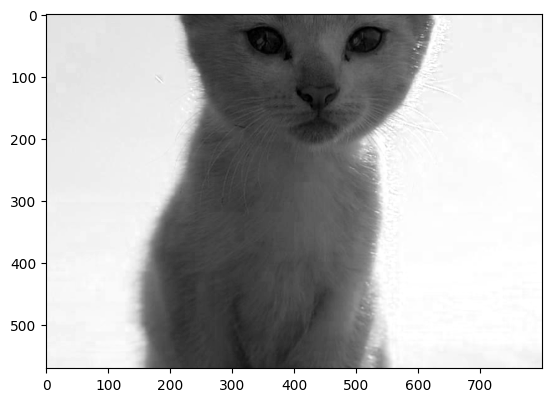

In [83]:
url = "https://placekitten.com/800/571"
im = io.imread(url)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # RGB
print (im.shape)
plt.imshow (im[:,:,0], 'gray')

Na aula passada, vimos que é muito fácil "recortar" um trecho da imagem (ou matriz).

No trecho abaixo, selecionamos um trecho ou recorte da imagem lida no passo anterior.

(400, 640)


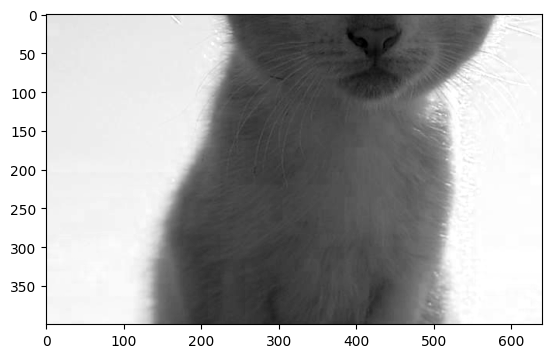

In [84]:
# escolhemos um recorte para testar amostragem ("espacial")
imCut = im[100:500,15:655,0]
print (imCut.shape)
plt.imshow (imCut, 'gray')

### Amostragem ("espacial")

Iniciaremos a nossa "discretização" pela quantidade de pixels amostrados.

Vamos testar resoluções cada vez menores, ou seja, diminuição da quantidade de pixels amostrados e ver os resultados.

No exemplo abaixo, primeiro dividiremos a imagem ao meio, tanto no eixo X como no eixo Y, ou seja, dividiremos a quantidade total de pixels da imagem por 4.


(200, 320)


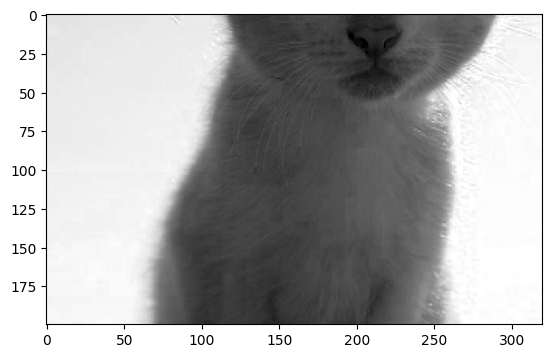

In [90]:
h, w = imCut.shape
im2 = np.zeros((h//2,w//2),dtype='uint8')
h2, w2 = im2.shape
for i in range (h2):
  for j in range (w2):
    im2[i][j] = imCut[2*i][2*j]
print (im2.shape)
plt.imshow (im2, 'gray')

E aí? Percebeu alguma diferença com relação a imagem original?

Provavelmente não, certo?

Similarmente, vamos repetir o experimento anterior, ou seja, o resultado final será uma imagem que dividirá o eixo X por 4 e o eixo Y também por 4.

O resultado final terá a quantidade total de pixels dividida por 16, certo?

(100, 160)


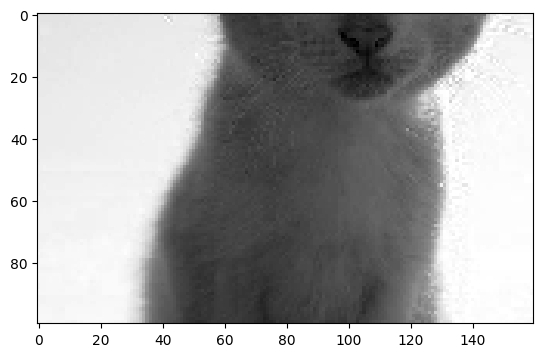

In [91]:
h, w = im2.shape
im3 = np.zeros((h//2,w//2),dtype='uint8')
h3, w3 = im3.shape
for i in range (h3):
  for j in range (w3):
    im3[i][j] = im2[2*i][2*j]
print (im3.shape)
plt.imshow (im3, 'gray')

Vendo o resultado anterior, acho que agora ficou mais evidente a "perda" de detalhes na imagem, correto?

Note que a imagem resultante ficou mais "pixelada", com "quadradinhos" bem evidentes na imagem...

Se repetirmos o mesmo experimento, o resultado final seria a imagem original divida por quanto, hein?

Execute o código abaixo e veja o resultado.

(50, 80)


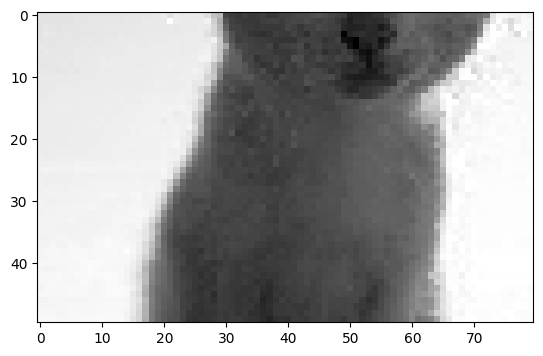

In [92]:
h, w = im3.shape
im4 = np.zeros((h//2,w//2),dtype='uint8')
h4, w4 = im4.shape
for i in range (h4):
  for j in range (w4):
    im4[i][j] = im3[2*i][2*j]
print (im4.shape)
plt.imshow (im4, 'gray')

Para visualizar melhor todo o processo de "diminuição" do tamanho espacial da imagem, vamos executar os trechos de códigos abaixo...

In [93]:
# escrevendo tudo dentro de um laco de repeticao
images = [imCut.copy()]
print (images[0].shape)
for k in range(3):
  h, w = images[k].shape
  im = np.zeros((h//2,w//2),dtype='uint8')
  h2, w2 = im.shape
  for i in range (h2):
    for j in range (w2):
      im[i][j] = images[k][2*i][2*j]
  print (im.shape)
  images.append(im.copy())

(400, 640)
(200, 320)
(100, 160)
(50, 80)


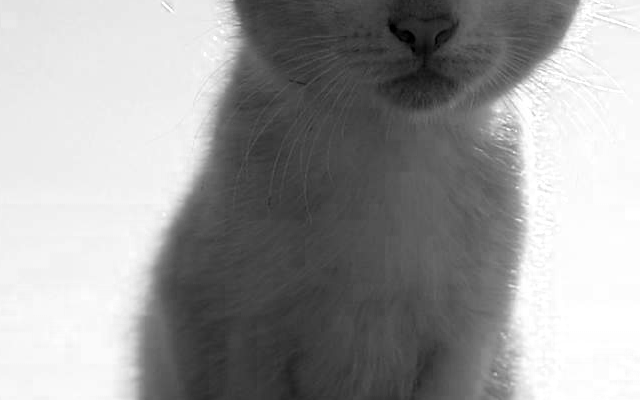

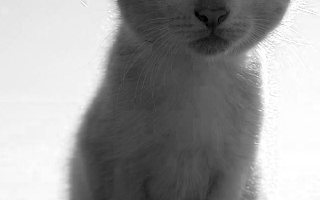

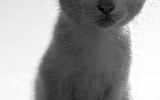

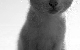

In [94]:
# exibe os resultados
for i in range(len(images)):
  cv2_imshow (images[i])

### Quantização ("níveis de cinza")

Na seção anterior, vimos um processo de discretização espacial, ou seja, na quantidade de pixels da imagem.

Agora, vamos examinar o processo de discretização espectral, ou seja, na quantidade de níveis de cinza.

De maneira mais específica, vamos testar resoluções cada vez menores: diminuição na quantidade de níveis de cinza.

No código abaixo, exibiremos algumas informações da imagem usada como exemplo: dimensões, tipo, nível máximo de cinza.

(400, 640)
uint8
nivel max:  255


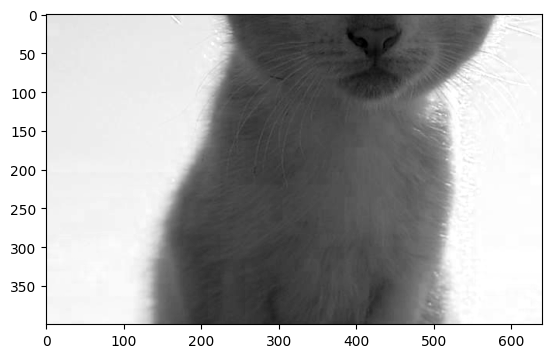

In [95]:
# recorte para testar quantizacao ("niveis de cinza")
print (imCut.shape)
print (imCut.dtype)
print ("nivel max: ", np.max(imCut))
plt.imshow (imCut, 'gray')

No exemplo abaixo, diminuiremos a quantidade de níveis de cinza pela metade, similarmente ao que foi feito no experimento anterior no contexto espacial.

nivel max:  127


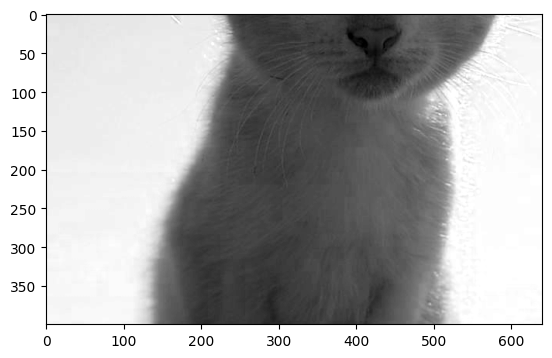

In [96]:
h, w = imCut.shape
im2 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im2[i][j] = imCut[i][j] // 2
print ("nivel max: ", np.max(im2))
plt.imshow (im2, 'gray')

Observando o resultado, notou alguma diferença com relação a imagem original?

Ainda não?

Vamos repetir o mesmo procedimento, "dividindo o resultado anterior por 2" e ver o que acontece...

nivel max:  63


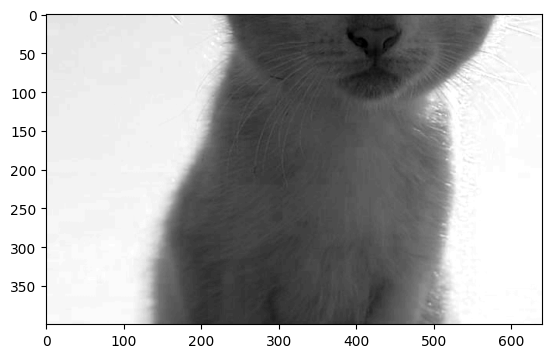

In [97]:
h, w = imCut.shape
im3 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im3[i][j] = im2[i][j] // 2
print ("nivel max: ", np.max(im3))
plt.imshow (im3, 'gray')

Ainda tá bem parecido?

Vamos repetir o procedimento para diminuir ainda mais a quantidade de níveis de cinza?

Bora lá e executar o trecho de código abaixo...

nivel max:  31


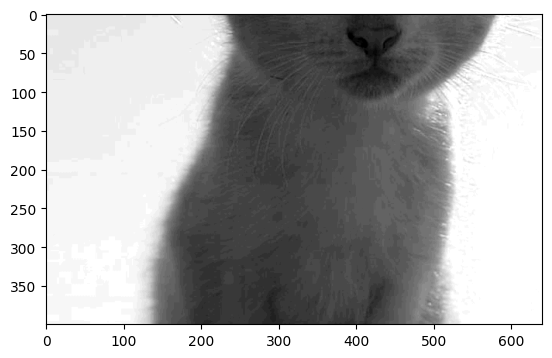

In [98]:
h, w = imCut.shape
im4 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im4[i][j] = im3[i][j] // 2
print ("nivel max: ", np.max(im4))
plt.imshow (im4, 'gray')

Neste ponto, já reduzimos a quantidade de níveis de cinza por 8 e ainda provavelmente conseguimos uma "boa" aproximação da imagem, certo?

Vamos prosseguir com o experimento e reduzir ainda mais os níveis de cinza?

Execute o trecho de código abaixo e veja o qua acontece.

nivel max:  15


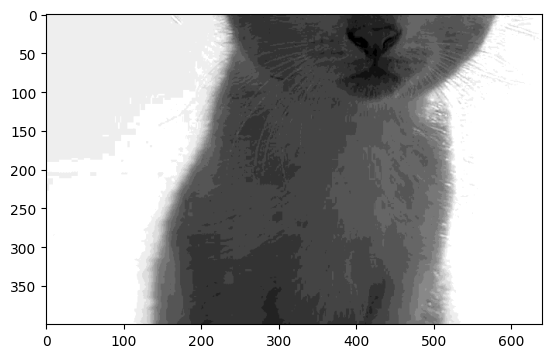

In [99]:
h, w = imCut.shape
im5 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im5[i][j] = im4[i][j] // 2
print ("nivel max: ", np.max(im5))
plt.imshow (im5, 'gray')

Neste ponto, dependendo do exemplo lido no passo inicial, provavelmente temos apenas 16 níveis de cinza disponíveis na imagem e podemos observar "perdas" nos detalhes.

Vamos repetir e ver o que acontece se diminuirmos para 8 níveis?

nivel max:  7


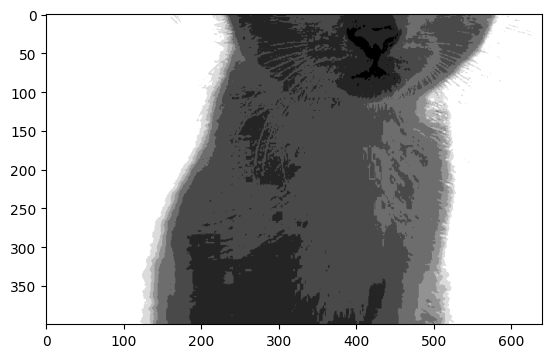

In [100]:
h, w = imCut.shape
im6 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im6[i][j] = im5[i][j] // 2
print ("nivel max: ", np.max(im6))
plt.imshow (im6, 'gray')

Agora o resultado deve estar mais evidente: há uma perda considerável nos detalhes.

Vamos reduzir para 4 níveis?

Execute o trecho de código abaixo e veja o resultado.

nivel max:  3


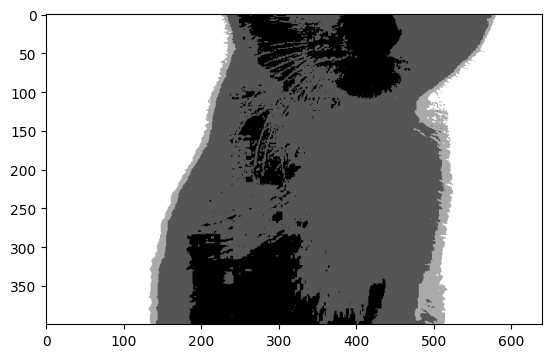

In [101]:
h, w = imCut.shape
im7 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im7[i][j] = im6[i][j] // 2
print ("nivel max: ", np.max(im7))
plt.imshow (im7, 'gray')

O resultado provavelmente deve estar "bem" pobre, com perdas significativas de detalhes na imagem.

Agora, o que acontece se executarmos mais uma vez a redução de níveis de cinza?

Execute o trecho de código abaixo e veja o que acontece.

nivel max:  1


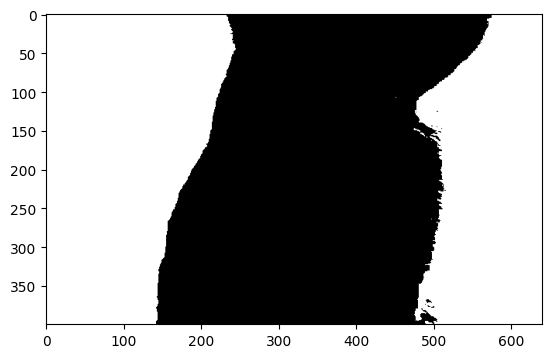

In [102]:
h, w = imCut.shape
im8 = np.zeros((h,w),dtype='uint8')
for i in range (h):
  for j in range (w):
    im8[i][j] = im7[i][j] // 2
print ("nivel max: ", np.max(im8))
plt.imshow (im8, 'gray')

Uau, o resultado anterior virou uma imagem binária!

Vamos organizar agora tudo o que fizemos durante a discretização (espectral) dos níveis de cinza?

Execute os trechos de códigos abaixo e veja os resultados obtidos.

In [103]:
# agora vamos colocar tudo dentro de um laco de repeticao
images2 = [imCut]
print ("nivel max: ", np.max(images2[0]))
for k in range (7):
  h, w = images2[k].shape
  im2 = np.zeros((h,w),dtype='uint8')
  for i in range (h):
    for j in range (w):
      im2[i][j] = images2[k][i][j] // 2
  print ("nivel max: ", np.max(im2))
  images2.append (im2.copy ())

nivel max:  255
nivel max:  127
nivel max:  63
nivel max:  31
nivel max:  15
nivel max:  7
nivel max:  3
nivel max:  1


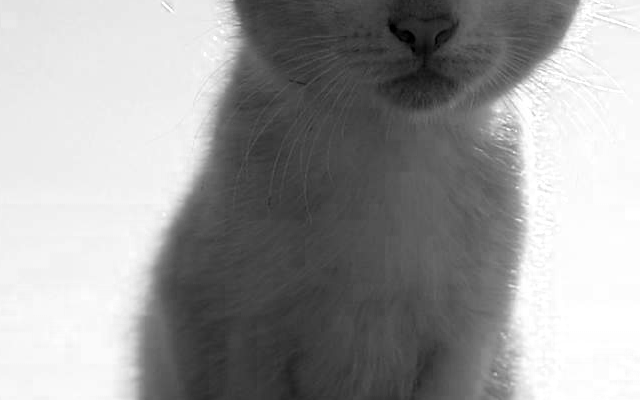

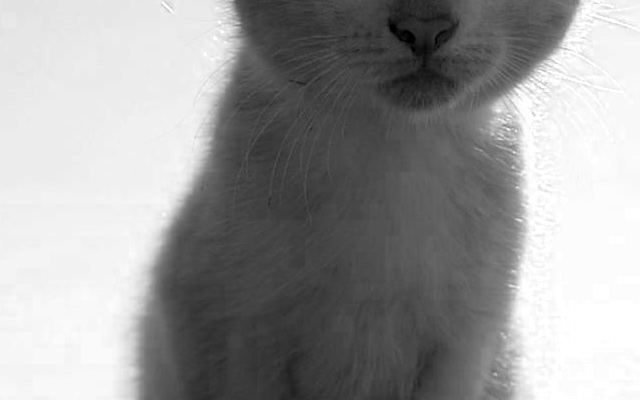

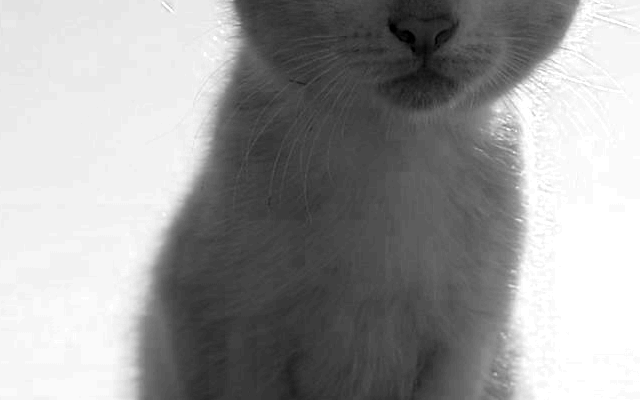

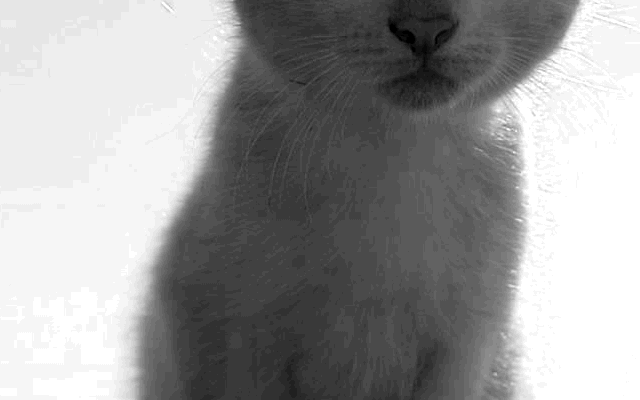

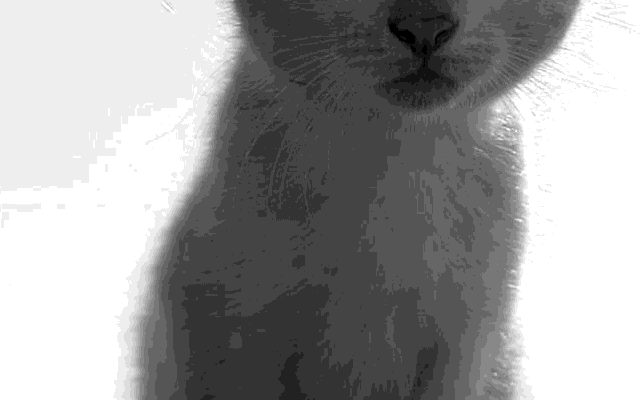

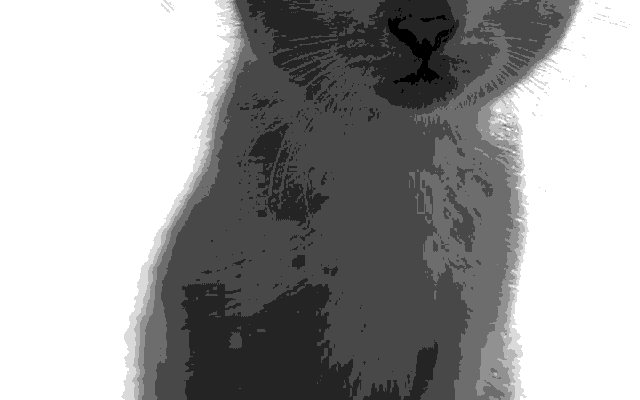

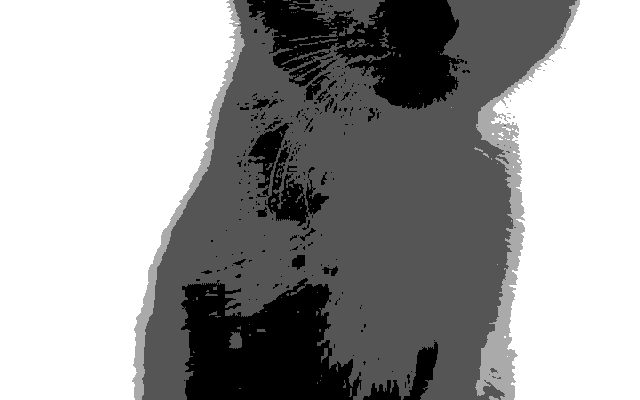

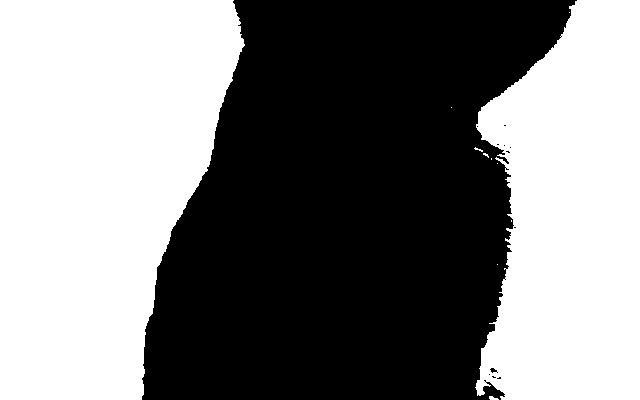

In [104]:
# exibe os resultados
for i in range(len(images2)):
  cv2_imshow (images2[i] * (255/np.max(images2[i])))   # por que multiplicar por (255/np.max(images2[i]))?
                                                       # veja o que acontece se exibir somente "images2[i]"

Para exibir de uma forma mais fácil de visualizar, vamos colar tudo na horizontal?

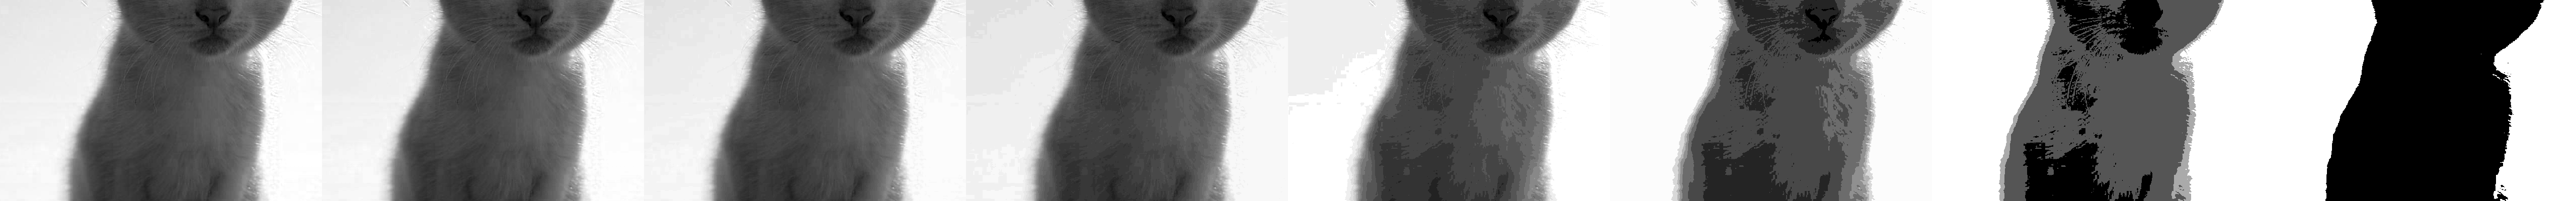

In [105]:
# exibe os resultados um ao lado do outro
cont = 0
for img in images2:
  if cont == 0:
    result = img.copy()
  else:
    result = cv2.hconcat ([result, img * int(255/np.max(img))])
  cont += 1
cv2_imshow (result)


### Exercício 1

Considere a seguinte imagem:

https://drive.google.com/u/3/uc?id=1_z1JK_lLZyUMZcGLysOV6Ks1g0VpGQIR&export=download

Tarefas:

- abra a imagem especificada acima (você pode usar exatamente o link acima);
- faça um experimento de discretização espacial similar ao que foi feito no exemplo deste tutorial: tamanho original, depois dividir X e Y por 2, diminuido a imagem original progressivamente;
- exiba os resultados na tela.



(50, 80)
(25, 40)


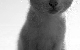

(12, 20)


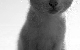

In [77]:
url = "https://drive.google.com/u/3/uc?id=1_z1JK_lLZyUMZcGLysOV6Ks1g0VpGQIR&export=download"
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB

imCut = im[0:50,0:80]

images = [imCut.copy()]
print (images[0].shape)
for k in range(2):
  h, w = images[k].shape
  im = np.zeros((h//2,w//2),dtype='uint8')
  h2, w2 = im.shape
  for i in range (h2):
    for j in range (w2):
      im[i][j] = images[k][2*i][2*j]
  print (im.shape)
  images.append(im.copy())

  for i in range(len(images)):
    cv2_imshow (images[i])

### Execício 2

Para a mesma imagem do exercício anterior, faça o experimento de discretização espectral, ou seja, redução dos níveis de cinza, conforme feito no exemplo deste tutorial.

Exiba os resultado na tela, um ao lado do outro, na horizontal.

In [113]:
url = "https://drive.google.com/u/3/uc?id=1_z1JK_lLZyUMZcGLysOV6Ks1g0VpGQIR&export=download"
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB

imCut = im[0:100,0:160]

images2 = [imCut]
print ("nivel max: ", np.max(images2[0]))
for k in range (7):
  h, w = images2[k].shape
  im2 = np.zeros((h,w),dtype='uint8')
  for i in range (h):
    for j in range (w):
      im2[i][j] = images2[k][i][j] // 2
  print ("nivel max: ", np.max(im2))
  images2.append (im2.copy ())

nivel max:  255
nivel max:  127
nivel max:  63
nivel max:  31
nivel max:  15
nivel max:  7
nivel max:  3
nivel max:  1


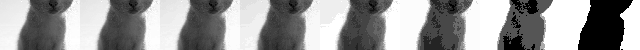

In [114]:
cont = 0
for img in images2:
  if cont == 0:
    result = img.copy()
  else:
    result = cv2.hconcat ([result, img * int(255/np.max(img))])
  cont += 1
cv2_imshow (result)